In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("DATASET FINAL.csv")
dataset

,GENDER,AGE,BMI,TEMP,SBP,Pulse,ALCOHOL,SMOKER,SLEEP HOURS,HEALTH LEVEL
0,male,19,33.770,98.6,120,80,no,yes,5.0,2
1,male,18,24.450,95.0,140,75,no,no,9.0,1
2,male,28,22.705,104.0,155,92,no,no,9.0,1
3,male,33,28.880,110.5,115,79,yes,no,11.0,2
4,female,32,25.740,94.3,119,85,no,no,6.0,1
...,...,...,...,...,...,...,...,...,...,...
144,female,30,23.450,110.5,154,83,no,yes,10.0,2
145,male,29,30.495,113.9,118,73,no,no,10.0,1
146,female,46,37.730,95.0,125,79,no,yes,13.0,2
147,female,51,37.430,94.3,132,78,no,no,5.0,2


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.isnull().sum()

GENDER          0
AGE             0
BMI             0
TEMP            0
SBP             0
Pulse           0
ALCOHOL         0
SMOKER          0
SLEEP HOURS     1
HEALTH LEVEL    0
dtype: int64

In [5]:
dataset[dataset['SLEEP HOURS'].isnull()].index.tolist()

[23]

In [6]:
dataset.drop(23,axis=0,inplace=True)

In [7]:
dataset.isnull().any()

GENDER          False
AGE             False
BMI             False
TEMP            False
SBP             False
Pulse           False
ALCOHOL         False
SMOKER          False
SLEEP HOURS     False
HEALTH LEVEL    False
dtype: bool

In [8]:
dataset.describe()

,AGE,BMI,TEMP,SBP,Pulse,SLEEP HOURS,HEALTH LEVEL
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,38.283784,27.567230,100.221622,123.500000,75.520270,7.763514,1.493243
std,14.854872,6.259867,5.915948,14.534734,5.349639,3.233249,0.644143
min,18.000000,13.200000,94.300000,95.000000,60.000000,3.000000,0.000000
25%,25.750000,22.887500,96.000000,117.000000,71.750000,5.000000,1.000000
50%,36.500000,26.315000,97.000000,119.000000,76.000000,8.000000,2.000000
75%,53.000000,31.905000,104.000000,132.000000,79.000000,11.000000,2.000000
max,64.000000,49.060000,113.900000,155.000000,92.000000,13.000000,2.000000


In [9]:
dataset.corr()

,AGE,BMI,TEMP,SBP,Pulse,SLEEP HOURS,HEALTH LEVEL
AGE,1.000000,-0.061928,-0.073283,0.100665,-0.042446,-0.102838,0.000202
BMI,-0.061928,1.000000,0.002781,0.058924,0.063908,-0.113931,0.273150
TEMP,-0.073283,0.002781,1.000000,0.029296,0.034399,-0.057559,0.165701
SBP,0.100665,0.058924,0.029296,1.000000,0.555683,0.201862,0.013442
Pulse,-0.042446,0.063908,0.034399,0.555683,1.000000,0.173132,0.023730
SLEEP HOURS,-0.102838,-0.113931,-0.057559,0.201862,0.173132,1.000000,-0.090597
HEALTH LEVEL,0.000202,0.273150,0.165701,0.013442,0.023730,-0.090597,1.000000


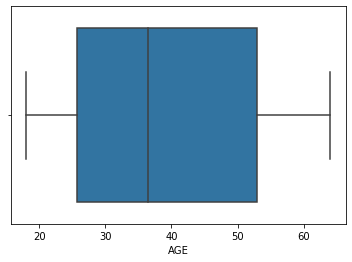

In [10]:
sns.boxplot(dataset["AGE"])

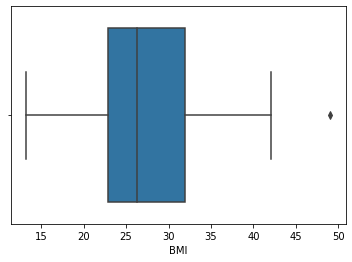

In [11]:
sns.boxplot(dataset["BMI"])

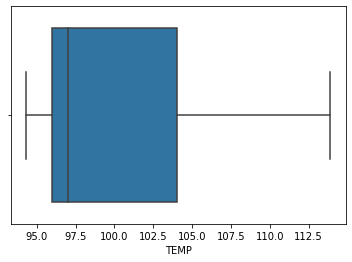

In [12]:
sns.boxplot(dataset["TEMP"])

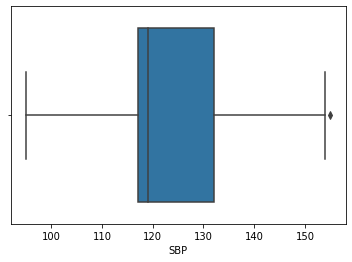

In [13]:
sns.boxplot(dataset["SBP"])

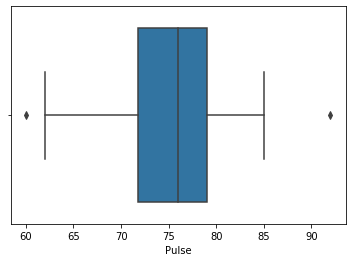

In [14]:
sns.boxplot(dataset["Pulse"])

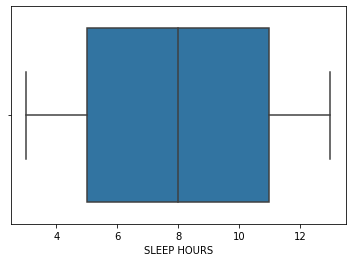

In [15]:
sns.boxplot(dataset["SLEEP HOURS"])

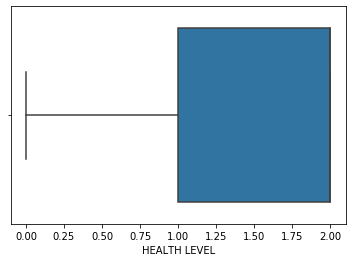

In [16]:
sns.boxplot(dataset["HEALTH LEVEL"])

In [17]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
IQR = q3-q1
IQR


AGE             27.2500
BMI              9.0175
TEMP             8.0000
SBP             15.0000
Pulse            7.2500
SLEEP HOURS      6.0000
HEALTH LEVEL     1.0000
dtype: float64

In [18]:
dataset_no_outlier = dataset[~((dataset<(q1-1.5*IQR))|(dataset>(q3 + 1.5*IQR))).any(axis=1)]
dataset_no_outlier

,GENDER,AGE,BMI,TEMP,SBP,Pulse,ALCOHOL,SMOKER,SLEEP HOURS,HEALTH LEVEL
0,male,19,33.770,98.6,120,80,no,yes,5.0,2
1,male,18,24.450,95.0,140,75,no,no,9.0,1
3,male,33,28.880,110.5,115,79,yes,no,11.0,2
4,female,32,25.740,94.3,119,85,no,no,6.0,1
5,female,31,24.760,99.0,95,75,no,no,6.0,0
...,...,...,...,...,...,...,...,...,...,...
144,female,30,23.450,110.5,154,83,no,yes,10.0,2
145,male,29,30.495,113.9,118,73,no,no,10.0,1
146,female,46,37.730,95.0,125,79,no,yes,13.0,2
147,female,51,37.430,94.3,132,78,no,no,5.0,2


In [19]:
type(dataset_no_outlier)

pandas.core.frame.DataFrame

In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset_no_outlier.iloc[:,0]=lb.fit_transform(dataset_no_outlier.iloc[:,0])
dataset_no_outlier.iloc[:,6]=lb.fit_transform(dataset_no_outlier.iloc[:,6])
dataset_no_outlier.iloc[:,7]=lb.fit_transform(dataset_no_outlier.iloc[:,7])
dataset_no_outlier


C:\Users\Priya\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,GENDER,AGE,BMI,TEMP,SBP,Pulse,ALCOHOL,SMOKER,SLEEP HOURS,HEALTH LEVEL
0,1,19,33.770,98.6,120,80,0,1,5.0,2
1,1,18,24.450,95.0,140,75,0,0,9.0,1
3,1,33,28.880,110.5,115,79,1,0,11.0,2
4,0,32,25.740,94.3,119,85,0,0,6.0,1
5,0,31,24.760,99.0,95,75,0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...
144,0,30,23.450,110.5,154,83,0,1,10.0,2
145,1,29,30.495,113.9,118,73,0,0,10.0,1
146,0,46,37.730,95.0,125,79,0,1,13.0,2
147,0,51,37.430,94.3,132,78,0,0,5.0,2


In [21]:
x=dataset_no_outlier.iloc[:,:9].values
x

array([[ 1.  , 19.  , 33.77, ...,  0.  ,  1.  ,  5.  ],
       [ 1.  , 18.  , 24.45, ...,  0.  ,  0.  ,  9.  ],
       [ 1.  , 33.  , 28.88, ...,  1.  ,  0.  , 11.  ],
       ...,
       [ 0.  , 46.  , 37.73, ...,  0.  ,  1.  , 13.  ],
       [ 0.  , 51.  , 37.43, ...,  0.  ,  0.  ,  5.  ],
       [ 1.  , 53.  , 23.3 , ...,  0.  ,  0.  ,  7.  ]])

In [22]:
y=dataset_no_outlier.iloc[:,9].values
y

array([2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [24]:
x_test.shape

(29, 9)

In [25]:
x_train.shape

(116, 9)

In [26]:
y_test.shape

(29,)

In [27]:
y_train.shape

(116,)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
y_pred = dt.predict(x_test)
y_pred

array([2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 2, 1, 1, 2, 2], dtype=int64)

In [30]:
y_test

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 2, 1, 1, 2, 2], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9310344827586207